# NEURAL NETWORKS

1 - Imports

In [636]:
import tensorflow as tf
import sklearn as sklearn
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import confusion_matrix, f1_score, roc_curve, roc_auc_score

%matplotlib inline
%run dataManagement.ipynb

2 - Data Preprocessing

In [637]:
# Data files
relativePath1 = '../Data/radiomics_features_set1.csv'
relativePath2 = '../Data/radiomics_features_set2.csv'

# Prepare data
data = readCSV(relativePath1, relativePath2)
labels = getLabels(data)
data = getData(data)
trainingData, testingData, trainingLabels, testingLabels = train_test_split(data, labels)

# Transforming to numpy array
trainingData = np.array(trainingData)
testingData = np.array(testingData)
trainingLabels = np.array(trainingLabels)
testingLabels = np.array(testingLabels)

# Normalize data between 0 and 1
scaler = MinMaxScaler(feature_range=(0, 1))
trainingData = scaler.fit_transform(trainingData)
testingData = scaler.fit_transform(testingData)

3 - Create Neural Networks

I - Neural Network

In [638]:
# Initializing the Neural Network
model = tf.keras.models.Sequential()

# Layers
model.add(tf.keras.layers.Dense(51, input_dim=102, activation='relu'))
model.add(tf.keras.layers.Dense(1, activation='sigmoid'))
model.summary()

# Compile
model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

Model: "sequential_63"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_164 (Dense)           (None, 51)                5253      
                                                                 
 dense_165 (Dense)           (None, 1)                 52        
                                                                 
Total params: 5,305
Trainable params: 5,305
Non-trainable params: 0
_________________________________________________________________


II - MLP Classifier

In [639]:
# Creating MLP Neural Network
MLPmodel = MLPClassifier(solver='lbfgs',
                         alpha=1e-5,
                         hidden_layer_sizes=(50,),
                         random_state=1)

4 - Fit Neural Networks

I - Neural Network

In [640]:
# Fit
hist = model.fit(trainingData, trainingLabels,
                 validation_split=0.2, epochs=350)  

Epoch 1/350
17/17 [==============================] - 1s 10ms/step - loss: 0.6254 - accuracy: 0.6647 - val_loss: 0.5315 - val_accuracy: 0.7769
Epoch 2/350
17/17 [==============================] - 0s 3ms/step - loss: 0.5289 - accuracy: 0.8372 - val_loss: 0.4594 - val_accuracy: 0.8769
Epoch 3/350
17/17 [==============================] - 0s 6ms/step - loss: 0.4574 - accuracy: 0.8391 - val_loss: 0.3933 - val_accuracy: 0.8538
Epoch 4/350
17/17 [==============================] - 0s 3ms/step - loss: 0.4126 - accuracy: 0.8488 - val_loss: 0.3543 - val_accuracy: 0.9000
Epoch 5/350
17/17 [==============================] - 0s 4ms/step - loss: 0.3752 - accuracy: 0.8643 - val_loss: 0.3214 - val_accuracy: 0.8615
Epoch 6/350
17/17 [==============================] - 0s 4ms/step - loss: 0.3667 - accuracy: 0.8566 - val_loss: 0.3046 - val_accuracy: 0.9000
Epoch 7/350
17/17 [==============================] - 0s 3ms/step - loss: 0.3388 - accuracy: 0.8702 - val_loss: 0.2866 - val_accuracy: 0.8769
Epoch 8/350


II - MLP Classifier

In [641]:
# Fit
MLPmodel.fit(trainingData, trainingLabels)

MLPClassifier(alpha=1e-05, hidden_layer_sizes=(50,), random_state=1,
              solver='lbfgs')

5 - Predict 

I - Neural Network

In [642]:
# Predict
predict = model.predict(testingData)

7/7 [==============================] - 0s 1ms/step


II - MLP Classifier

In [643]:
# Predict
MLPpredict = MLPmodel.predict(testingData)

6 - Accuracy during training

[]

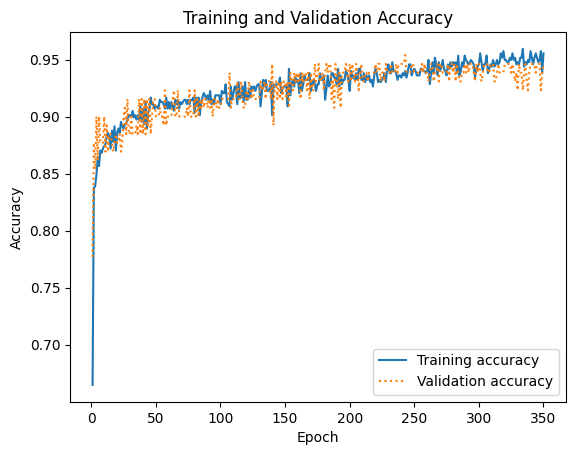

In [644]:
# Plot accuracy evolution during training
acc = hist.history['accuracy']
val = hist.history['val_accuracy']
epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, '-', label='Training accuracy')
plt.plot(epochs, val, ':', label='Validation accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.plot()

7 - Confusion Matrix

I - Neural Network

Text(77.92222222222227, 0.5, 'Actual label')

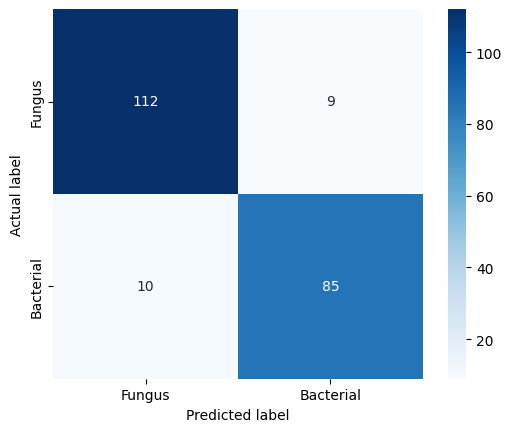

In [645]:
# Confusion Matrix
roundedPredict = predict.round()
confusionMatrix = confusion_matrix(testingLabels, roundedPredict)
labels = ['Fungus', 'Bacterial']

sb.heatmap(confusionMatrix, square=True, annot=True, fmt='d', cbar=True, cmap='Blues',
           xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted label')
plt.ylabel('Actual label')

II - MLP Classifier

Text(77.92222222222227, 0.5, 'Actual label')

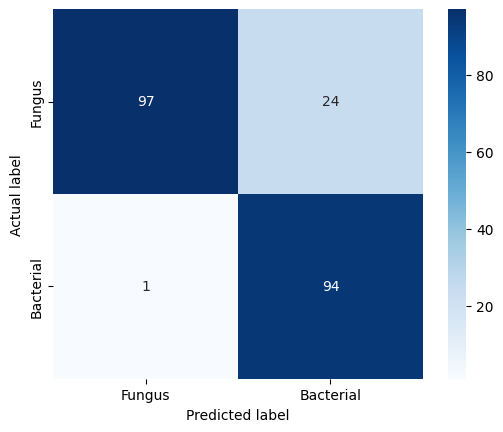

In [646]:
# Confusion Matrix
MLProundedPredict = MLPpredict.round()
MLPconfusionMatrix = confusion_matrix(testingLabels, MLProundedPredict)
labels = ['Fungus', 'Bacterial']

sb.heatmap(MLPconfusionMatrix, square=True, annot=True, fmt='d', cbar=True, cmap='Blues',
           xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted label')
plt.ylabel('Actual label')

8 - F-score

I - Neural Network

In [647]:
score = f1_score(testingLabels, roundedPredict)
print("F-score = ", score)

F-score =  0.8994708994708994


II - MLP Classifier

In [648]:
MLPscore = f1_score(testingLabels, MLProundedPredict)
print("F-score = ", MLPscore)

F-score =  0.8826291079812206


9 - Roc curves

I - Neural Network

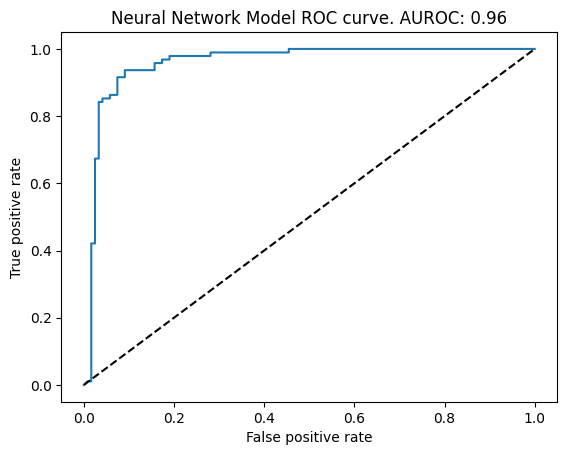

In [649]:
fpr, tpr, thresholds = roc_curve(testingLabels, predict)
AUROC = np.round(roc_auc_score(testingLabels, predict), 2)

plt.plot(fpr, tpr)
plt.plot(fpr, fpr, linestyle='--', color='k')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title(f'Neural Network Model ROC curve. AUROC: {AUROC}')
plt.show()

II - MLP Classifier

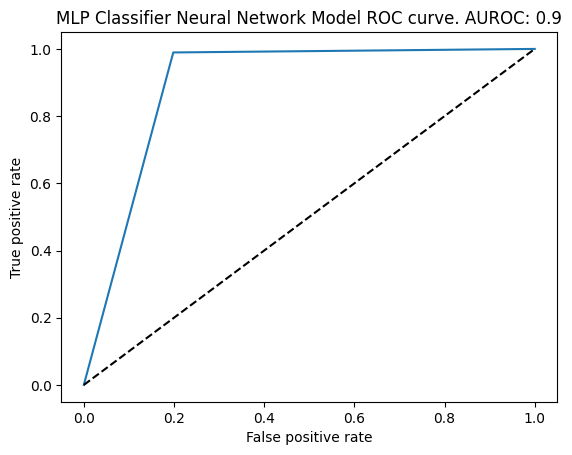

In [650]:
fpr, tpr, thresholds = roc_curve(testingLabels, MLPpredict)
AUROCMLP = np.round(roc_auc_score(testingLabels, MLPpredict), 2)

plt.plot(fpr, tpr)
plt.plot(fpr, fpr, linestyle='--', color='k')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title(f'MLP Classifier Neural Network Model ROC curve. AUROC: {AUROCMLP}')
plt.show()